# CONTEXT

The Tanzanian tourism sector plays a significant role in the Tanzanian economy, contributing about 17% to the country’s GDP and 25% of all foreign exchange revenues. The sector, which provides direct employment for more than 600,000 people and up to 2 million people indirectly, generated approximately $2.4 billion in 2018 according to government statistics. Tanzania received a record 1.1 million international visitor arrivals in 2014, mostly from Europe, the US and Africa. Tanzania is the only country in the world which has allocated more than 25% of its total area for wildlife, national parks, and protected areas.There are 16 national parks in Tanzania, 28 game reserves, 44 game-controlled areas, two marine parks and one conservation area.

# TASK

The objective of this competition is to explore and build a linear regression model that will predict the spending behaivior of tourists visiting Tanzania.The model can be used by different tour operators and the Tanzania Tourism Board to automatically help tourists across the world estimate their expenditure before visiting Tanzania.

# DATASET Description

The dataset describes 6476 rows of up-to-date information on tourist expenditure collected by the National Bureau of Statistics (NBS) in Tanzania.The dataset was collected to gain a better understanding of the status of the tourism sector and provide an instrument that will enable sector growth. The survey covers seven departure points, namely: Julius Nyerere International Airport, Kilimanjaro International Airport, Abeid Amani Karume International Airport, and the Namanga, Tunduma, Mtukula and Manyovu border points.

In [1]:
#import libraries and set matplotlib to display plots inline
import pandas as pd #for dataframe manipulation
import numpy as np #for numeric manipulation
import matplotlib.pyplot as plt #for plots and visualization
import seaborn as sns #for more complex visualization

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#show plots inline
%matplotlib inline

In [2]:
#import training and test datasets
train = pd.read_csv('Train .csv')
test = pd.read_csv('Test .csv')

In [3]:
#overview Of train Dataset
train.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [4]:
#training dataset shape
train.shape

(4809, 23)

# Test dataset

In [5]:
#Test dataset overview
test.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,...,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,No,7,14,Cash,No,No comments
3,tour_1006,CANADA,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,No,0,4,Cash,Yes,Friendly People
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,Yes,Yes,No,No,No,10,0,Cash,Yes,Friendly People


# Train dataset properties overview

In [6]:
#summary information on the training dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [7]:
#check for null values
train.isna().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [8]:
#set scale for plots
sns.set('talk') 

#set darkgrid style for plots
sns.set_style('darkgrid') 

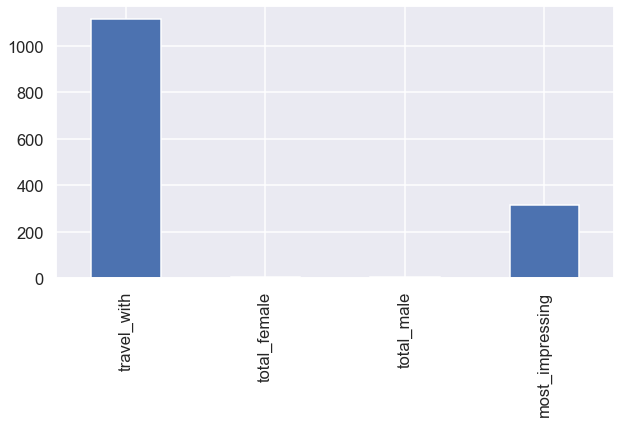

In [9]:
#Plot number of missing values

plt.figure(figsize = (10,5))
train.isna().sum()[train.isna().sum()>0].plot(kind='bar');

In [10]:
#check for duplicates
train.duplicated().sum()

print('The number of duplicates in this dataset is {}'.format(train.duplicated().sum()))


The number of duplicates in this dataset is 0


There are no duplicate rows among the training dataset

# Univariate Exploration of variabes

**Totalcost**

For this section, single variables will be explored, without their connection to any other variables
First off, with the total amount spent being the subject matter, it is important to understand the distribution of total_cost. The histogram below provides insight.

In [11]:
#find smallest amount paid
train.total_cost.min()

49000.0

In [12]:
#find largest amount paid
train.total_cost.max()

99532875.0

In [13]:
#find average amount paid
train.total_cost.mean()

8114388.777617801

The mean amount spent on tours is 8114388.777617801


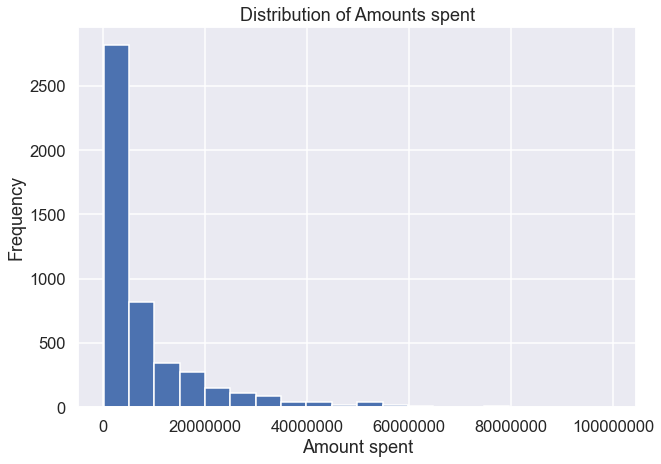

In [14]:
#Plot distribution of total_cost

plt.figure(figsize = (10,7))
train['total_cost'].plot(kind='hist', bins=range(48000, 100000000,  4974150))

#display x axis in normal form instead of scientific/standard form (1ex)
plt.ticklabel_format(style='plain')

plt.title("Distribution of Amounts spent")
plt.xlabel("Amount spent")
plt.ylabel("Frequency");
print('The mean amount spent on tours is {}'.format(train['total_cost'].mean()))


From the figure above, it is obvious that most of the travelers spend  less than 20 million dollars on each trip with the average amount being about $8 million 

**Age-Group**

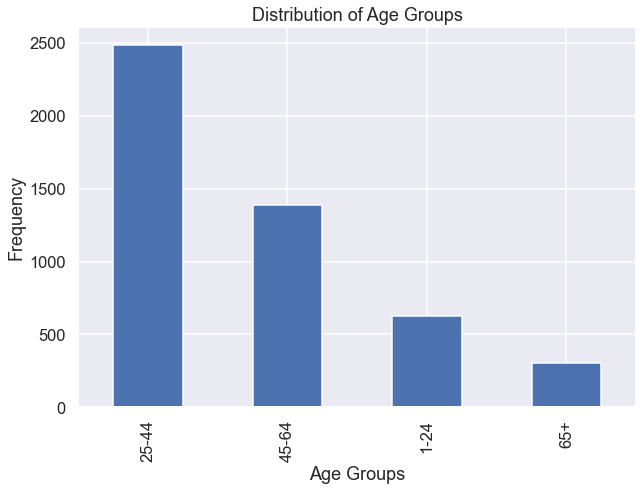

In [15]:
#plot distribution of age group
plt.figure(figsize = (10,7))

train['age_group'].value_counts().plot(kind='bar')

plt.title("Distribution of Age Groups")
plt.xlabel("Age Groups")
plt.ylabel("Frequency");

From the plot, we can see that the people who travel the most are the people within the ages of 25-44 followed by 45-64. This is likey due to the fact that they are gainfully employed and will be easily able to afford the travelling cost unlike the other age groups that may be largely composed of dependants

**Traveled with**

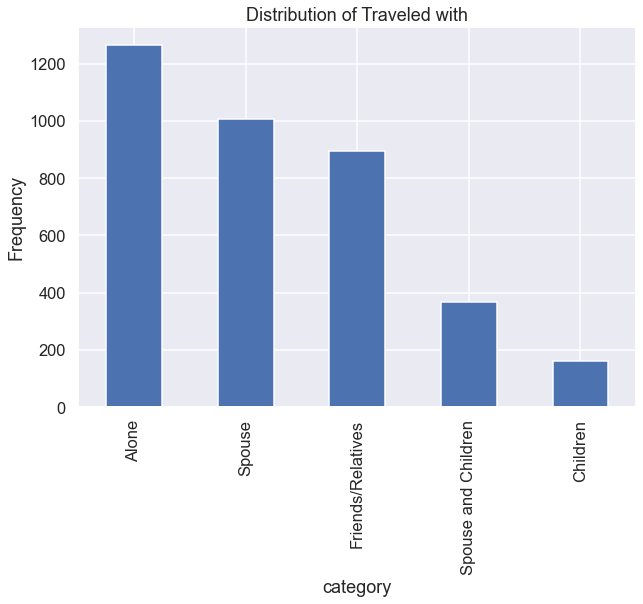

In [16]:
plt.figure(figsize = (10,7))
train['travel_with'].value_counts().plot(kind='bar')
plt.title("Distribution of Traveled with")
plt.xlabel("category")
plt.ylabel("Frequency");

A lot of people are either coming a lone or coming with their spouse. It is less ikely that people will come with their children

**Info source**

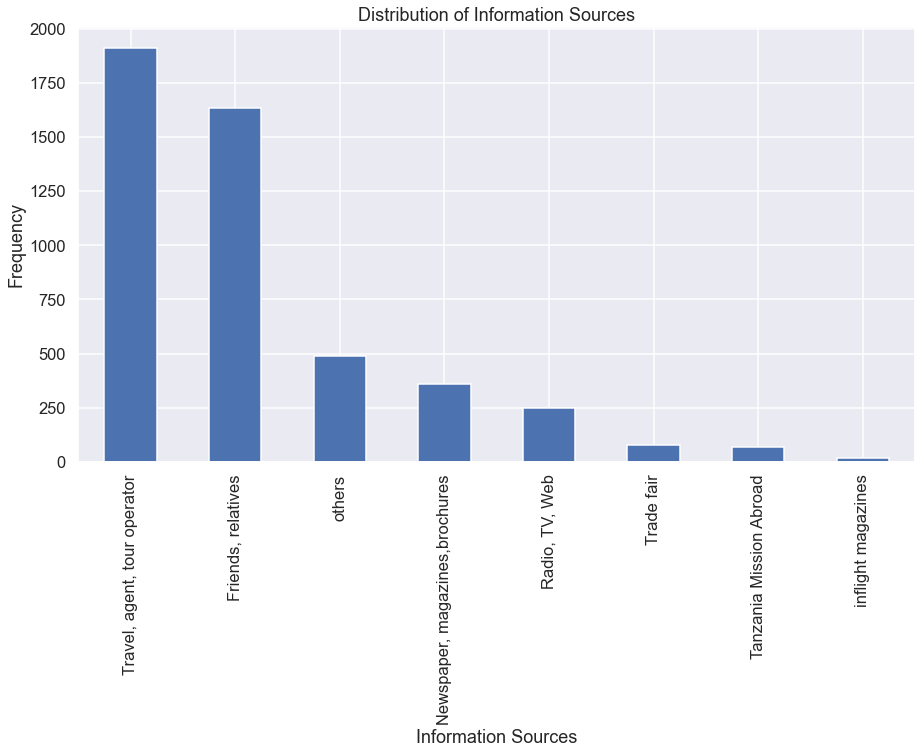

In [17]:
plt.figure(figsize = (15,8))
train['info_source'].value_counts().plot(kind='bar')
plt.title("Distribution of Information Sources")
plt.xlabel("Information Sources")
plt.ylabel("Frequency");

**main activity**

Text(0, 0.5, 'frequency')

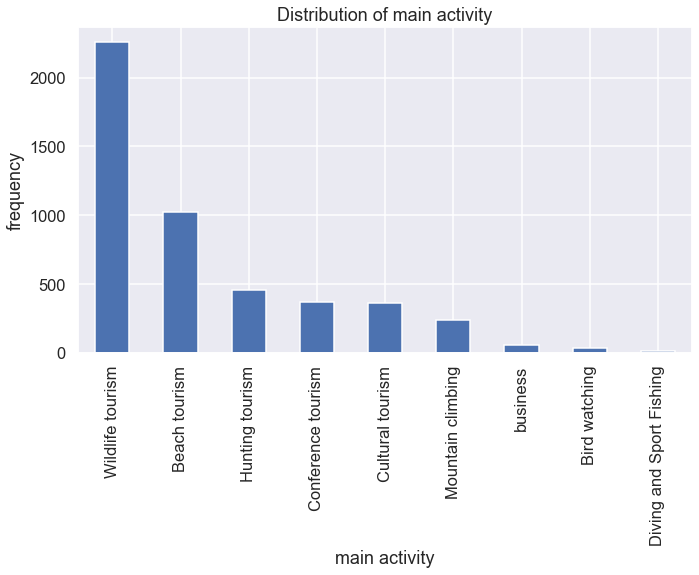

In [18]:
plt.figure(figsize=(11,6))
train['main_activity'].value_counts().plot(kind='bar')
plt.title ('Distribution of main activity')
plt.xlabel('main activity')
plt.ylabel('frequency')

Wildlife tourism and beach tourism are the most tourism activity that people love. Business, bird watching, driving & sport fishing are scarcely engaged in.

Text(0, 0.5, 'frequency')

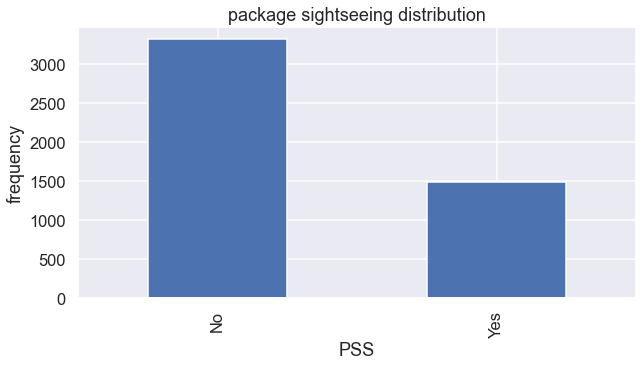

In [19]:
plt.figure(figsize=(10,5))
train['package_sightseeing'].value_counts().plot(kind='bar')
plt.title('package sightseeing distribution')
plt.xlabel('PSS')
plt.ylabel('frequency')

Most of the tour packages did not include sightseeing

## Bivariate Exploration

**GENDER**

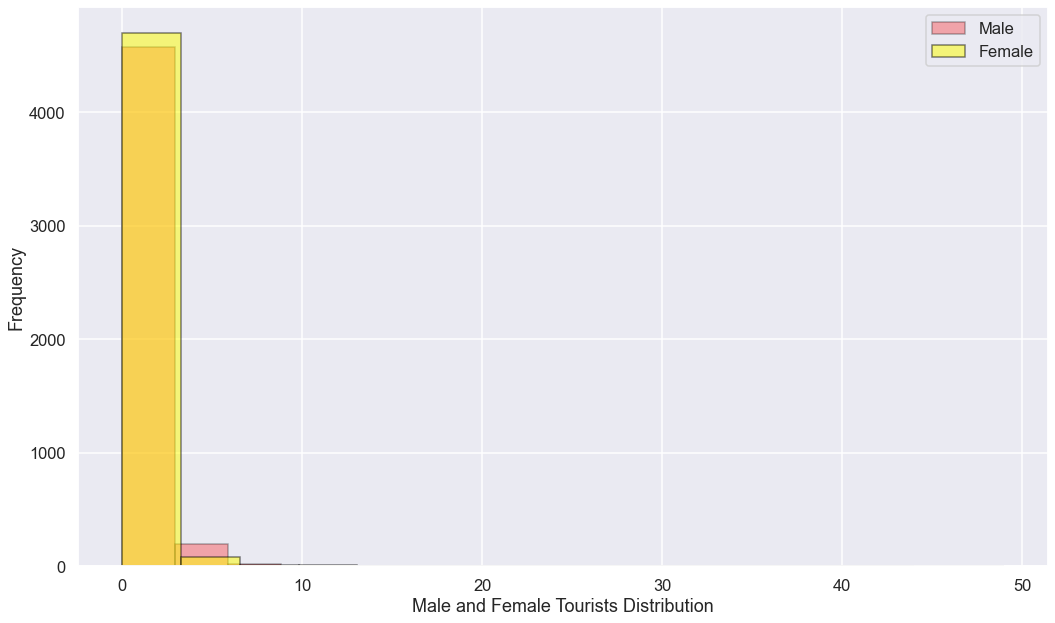

In [20]:
#Plot histograms of males vs females
plt.figure(figsize = (15,9))
plt.hist(train['total_male'],edgecolor='black', color='red', alpha = 0.3, label='Male', bins=15)
plt.hist(train['total_female'], edgecolor='black', color='yellow', alpha = 0.5, label='Female', bins=15)
plt.legend(loc='upper right')
 
plt.xlabel('Male and Female Tourists Distribution')
plt.ylabel('Frequency')

plt.tight_layout();

The distributions of male and female visitors are almost identical, with the number of male tourists just edging slightly. It can be seen than most of the time, the number of visitors for each gender is less than or equal to 3.

 **SPENDING STATISTICS**

What are the top 5 countries with the highest spending statistic?¶

In [21]:
train.groupby('country')['total_cost'].agg('sum').to_frame().sort_values('total_cost', ascending=False).head()

,total_cost
country,
UNITED STATES OF AMERICA,8.890832e+09
UNITED KINGDOM,3.808383e+09
ITALY,3.762160e+09
FRANCE,3.344496e+09
AUSTRALIA,2.743132e+09


**PAYMENT METHOD**

In [22]:
pm=train.groupby(by='payment_mode').count().sort_values('total_cost',ascending = False)['total_cost'].head()

Text(0.5, 1.0, 'payment method')

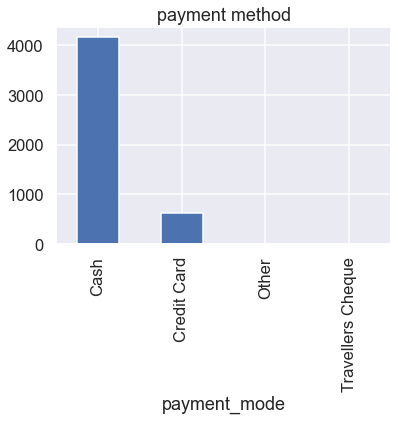

In [23]:
pm.plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')
plt.title('payment method')

Cash and credit cards are th most used method of payment for the tourists.

**AMOUNT SPENT PR AGE-GROUP**

<Figure size 504x360 with 0 Axes>

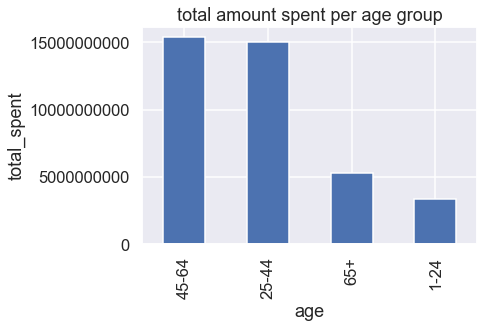

<Figure size 504x360 with 0 Axes>

In [24]:
agespend=train.groupby(by='age_group')['total_cost'].agg('sum').sort_values(ascending=False)

ags=agespend.plot(kind='bar')
ags.ticklabel_format(style='plain', axis='y')
plt.xlabel('age')
plt.title('total amount spent per age group')
plt.ylabel('total_spent')
plt.figure(figsize=(7,5))

The plot above shows that the age group that contributed the most to the total amount spent are age 45-64 and 25-44 respectively. This is understandable because most people within this range are still in the working class and will be able to afford the cost implications of travelling.

However, Let us check the age group that averagely spends the most on travelling

Text(0.5, 1.0, 'average spent per age group')

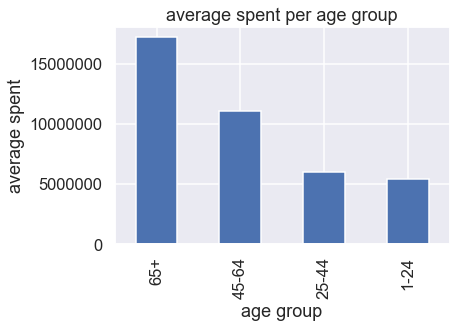

In [25]:
agemeanspend= train.groupby('age_group')['total_cost'].agg('mean').sort_values(ascending=False)
agms= agemeanspend.plot(kind='bar')
agms.ticklabel_format(style='plain', axis='y')
plt.xlabel('age group')
plt.ylabel('average spent')
plt.title('average spent per age group')

From this plot we can see that age 65+ has the highest average amount spent per age group. This can be caused be either 2 things.
1. Either there is an outlier in this column 
2. The individual cost of aged people is ordinarily higher than other age groups

It can also be observed from the second plot that there is a positive correlation between age range and the total amount of money spent per tour, with the amount of money spent increasing as the age range increases

**TOUR ARRANGEMENT VS TOTAL COST**

<AxesSubplot:>

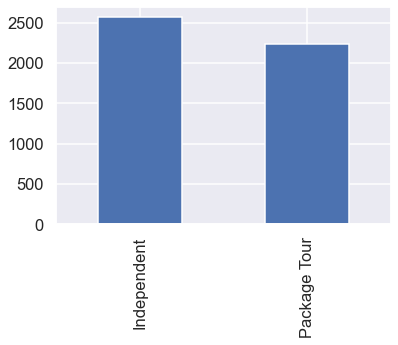

In [26]:
train['tour_arrangement'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'meancost vs tour arrangement')

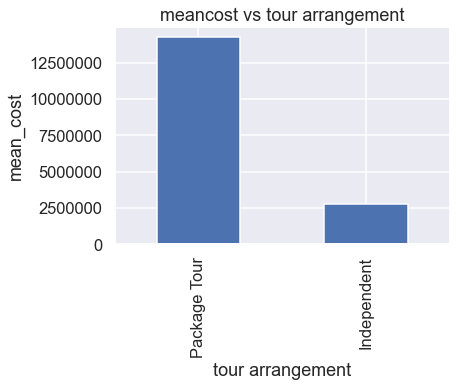

In [27]:
ta=train.groupby('tour_arrangement')['total_cost'].agg('mean').sort_values(ascending=False)
taplot=ta.plot(kind='bar')
taplot.ticklabel_format(style='plain', axis ='y')
plt.xlabel('tour arrangement')
plt.ylabel('mean_cost')
plt.title('meancost vs tour arrangement')

# MULTIVARIATE EXPLORATION**

This entails exploring relationships between more than two variables. In this section, the following questions will be answered:

What is the relationship between nights spent and total amount spent?
What is the relationship between age range, person/people traveled with and total amount spent?

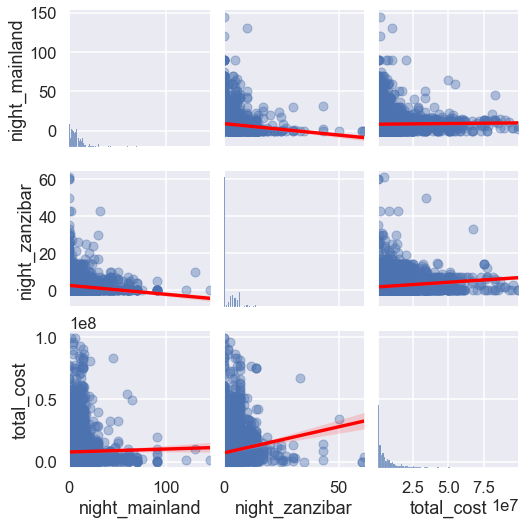

In [28]:
pair=train[['night_mainland','night_zanzibar','total_cost']]
sns.pairplot(pair, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.4}})

In [29]:
print('The correlation between total cost and night zanzibar is {}'.format(train['total_cost'].corr(train['night_zanzibar'])))
print('The correlation between total cost and night mainland is {}'.format(train['total_cost'].corr(train['night_mainland'])))
print('The correlation between night_mainland and night zanzibar is {}'.format(train['night_mainland'].corr(train['night_zanzibar'])))


The correlation between total cost and night zanzibar is 0.1451391087412815
The correlation between total cost and night mainland is 0.02047311027971818
The correlation between night_mainland and night zanzibar is -0.11815514846039064


The regression plot  compares 3 variables: total_cost, night_mainland, night_zanzibar. From the plot above, night mainland and night zanzibar seems to have a weak negative correlation which means that as more money is spent on one, less will be spent on the other. 

Comparing each with the total cost; night mainland and total cost seem not to have any correlation, however, total_cost and night zanzibar have a possitive correlation. Generally, all the correlations are weak.


**What is the relationship between age range, person/people traveled with and total amount spent?**

In [30]:
ga= train.groupby(['age_group','travel_with'])['total_cost'].agg('mean').reset_index()
ga

,age_group,travel_with,total_cost
0,1-24,Alone,3.948009e+06
1,1-24,Children,3.433385e+06
2,1-24,Friends/Relatives,9.011617e+06
3,1-24,Spouse,5.472071e+06
4,1-24,Spouse and Children,1.985278e+07
5,25-44,Alone,2.230397e+06
6,25-44,Children,6.450696e+06
7,25-44,Friends/Relatives,8.717945e+06
8,25-44,Spouse,9.780772e+06
9,25-44,Spouse and Children,1.525042e+07


Text(0.5, 0.98, 'Age Group vs People Traveled With vs Average Amount Spent')

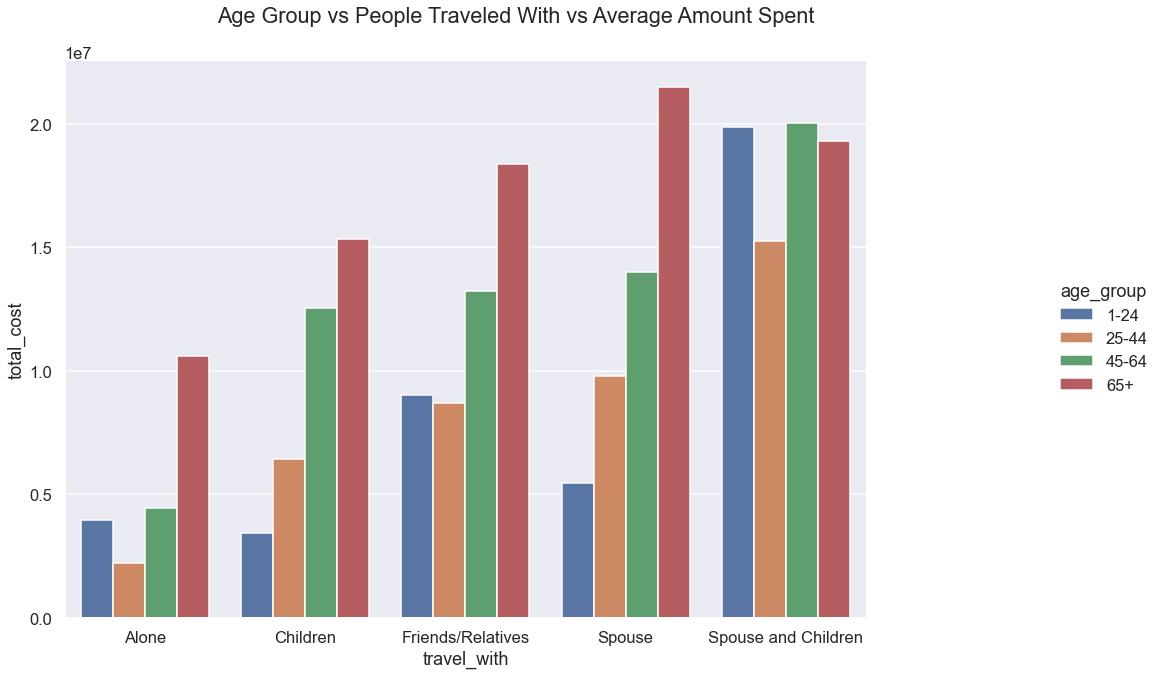

In [31]:
a=sns.catplot(x='travel_with', y='total_cost', hue ='age_group', data=ga, kind='bar') 
a.fig.set_size_inches(18,10)
a.fig.suptitle('Age Group vs People Traveled With vs Average Amount Spent')

Some insights from this plot:

- Average cost per age group is at the most when the individual travels with spouse and children
- Age 65+ spends the most when they go with their spouse and the least when they go alone
- There isn't much difference when a person  within age 45-64 travels with spouse or with children. - - To really get them to spend more, they have to go with spose and children.
- For people who are going aone, it is better to concentrate more on the aged (65 years and above) because they bring the most money.

# Data Preprocessing

This is the process of preparing the data to fit into the model. It entails ensuring the data is clean and ready to be used for prediction. Wrong preprocessing can lead to an innacurate model.
For this dataset, it will entail the following:

- Treatment of missing values

- Treatment of wrong datatypes

- Treatment of outliers as first detected

- Feature scaling

- Both the train and test data will be cleaned in order to ensure uniformness

**check for missing values**

In [32]:
train.isna().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [33]:
test.isna().sum()

ID                         0
country                    0
age_group                  0
travel_with              327
total_female               1
total_male                 2
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          111
dtype: int64

Travel with, total female, total male, most impressing all have missing fields in both the training and test dataset. However, Travel_with has the highest number of missing data and the rows with this missing data will be dropped. 
First, we have to combine the two dataset and then split them back after preprocessing.

In [34]:
#combine two dataframes by appending without sorting
df_alt = train.append(test, sort=False)

In [35]:
#fill nulls using forward fill
df_alt['travel_with'] = df_alt['travel_with'].ffill(inplace=False)


In [36]:
df_alt.isna().sum()

ID                          0
country                     0
age_group                   0
travel_with                 0
total_female                4
total_male                  7
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           424
total_cost               1601
dtype: int64

The rows with null values in the total male and total female columns will also be dropped

In [37]:
#drop rows with null values in total_male and total_female columns
df_alt.dropna(subset=['total_female', 'total_male'], inplace=True)
df_alt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6399 entries, 0 to 1600
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     6399 non-null   object 
 1   country                6399 non-null   object 
 2   age_group              6399 non-null   object 
 3   travel_with            6399 non-null   object 
 4   total_female           6399 non-null   float64
 5   total_male             6399 non-null   float64
 6   purpose                6399 non-null   object 
 7   main_activity          6399 non-null   object 
 8   info_source            6399 non-null   object 
 9   tour_arrangement       6399 non-null   object 
 10  package_transport_int  6399 non-null   object 
 11  package_accomodation   6399 non-null   object 
 12  package_food           6399 non-null   object 
 13  package_transport_tz   6399 non-null   object 
 14  package_sightseeing    6399 non-null   object 
 15  pack

Next, we convert the data types that are inappropriate to their appropriate data types:

    -Total male
    -Total female
    -night mainand
    -night zanzibar
    

In [38]:
#convert unrealistic float datatypes to int
df_alt = df_alt.astype({"total_male": int, 'total_female': int, 'night_mainland': int, 'night_zanzibar': int}, errors='raise') 

In [39]:
df_alt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6399 entries, 0 to 1600
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     6399 non-null   object 
 1   country                6399 non-null   object 
 2   age_group              6399 non-null   object 
 3   travel_with            6399 non-null   object 
 4   total_female           6399 non-null   int32  
 5   total_male             6399 non-null   int32  
 6   purpose                6399 non-null   object 
 7   main_activity          6399 non-null   object 
 8   info_source            6399 non-null   object 
 9   tour_arrangement       6399 non-null   object 
 10  package_transport_int  6399 non-null   object 
 11  package_accomodation   6399 non-null   object 
 12  package_food           6399 non-null   object 
 13  package_transport_tz   6399 non-null   object 
 14  package_sightseeing    6399 non-null   object 
 15  pack

**Removal of outliers**

Outlier in the total_cost, night_mainland and night_zanzibar columns will be removed. To remove outliers, we can:

-Compute the Z-score of each value in the columns, relative to the columns' means and standard deviations

-Take the absolute Z-score.

-Check that columns satisfy the constraints

In [40]:
#duplicate df_alt
df_new = df_alt.copy()

In [41]:
#import scipy.stats to calculate Z Score
from scipy import stats

In [42]:
#calculate z_score and remove outliers accross night_zanzibar column
df_new = df_new[(np.abs(stats.zscore(df_new['night_zanzibar'])) < 3)]

#calculate z_score and remove outliers accross night_mainland column
df_new = df_new[(np.abs(stats.zscore(df_new['night_mainland'])) < 3)]

In [43]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6209 entries, 0 to 1600
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     6209 non-null   object 
 1   country                6209 non-null   object 
 2   age_group              6209 non-null   object 
 3   travel_with            6209 non-null   object 
 4   total_female           6209 non-null   int32  
 5   total_male             6209 non-null   int32  
 6   purpose                6209 non-null   object 
 7   main_activity          6209 non-null   object 
 8   info_source            6209 non-null   object 
 9   tour_arrangement       6209 non-null   object 
 10  package_transport_int  6209 non-null   object 
 11  package_accomodation   6209 non-null   object 
 12  package_food           6209 non-null   object 
 13  package_transport_tz   6209 non-null   object 
 14  package_sightseeing    6209 non-null   object 
 15  pack

2.1119342889354162


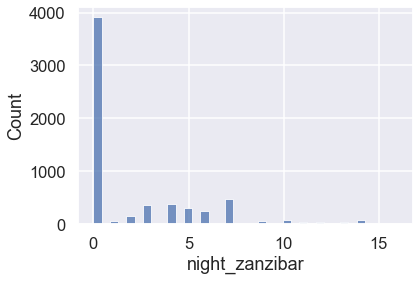

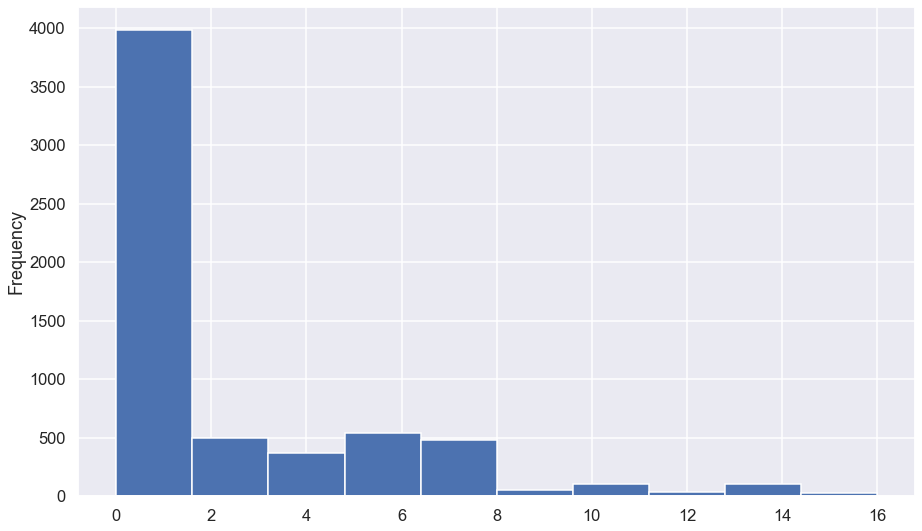

In [44]:
sns.histplot(data = df_new, x='night_zanzibar')

plt.figure(figsize=(15,9))
df_new['night_zanzibar'].plot(kind = 'hist')
#display x axis in normal form instead of scientific/standard form (1ex)
plt.ticklabel_format(style = 'plain')
print(df_new['night_zanzibar'].mean())

2.1119342889354162


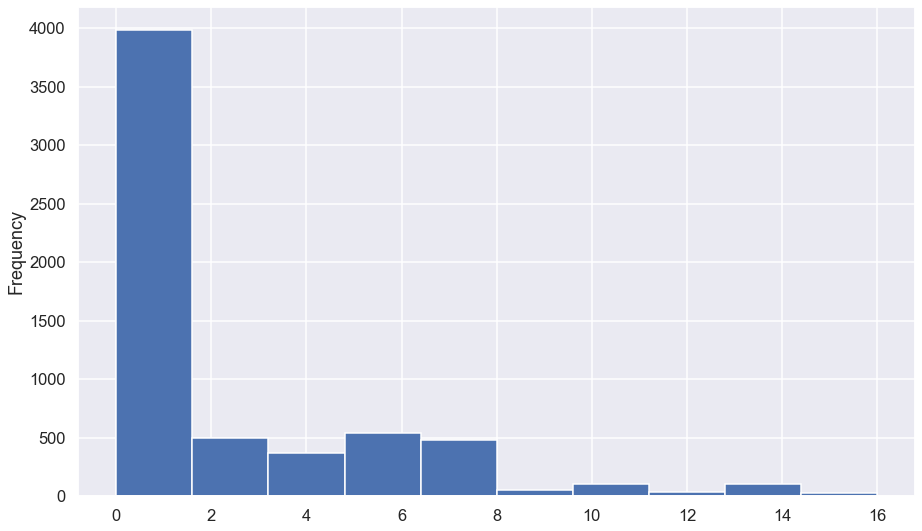

In [45]:
#Plot distribution of night_zanzibar
plt.figure(figsize = (15,9))
df_new['night_zanzibar'].plot(kind='hist')
#display x axis in normal form instead of scientific/standard form (1ex)
plt.ticklabel_format(style='plain');
print(df_new['night_zanzibar'].mean())

# Splitting data into two different datasets

From this point on, the train and test datasets will be separated again so as to exclude the null values in the test dataset and select the best features. The train and test dataframes will be scaled separately

In [46]:
#get new train data
train2 = df_new[~(df_new['total_cost'].isna())]

In [47]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4655 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4655 non-null   object 
 1   country                4655 non-null   object 
 2   age_group              4655 non-null   object 
 3   travel_with            4655 non-null   object 
 4   total_female           4655 non-null   int32  
 5   total_male             4655 non-null   int32  
 6   purpose                4655 non-null   object 
 7   main_activity          4655 non-null   object 
 8   info_source            4655 non-null   object 
 9   tour_arrangement       4655 non-null   object 
 10  package_transport_int  4655 non-null   object 
 11  package_accomodation   4655 non-null   object 
 12  package_food           4655 non-null   object 
 13  package_transport_tz   4655 non-null   object 
 14  package_sightseeing    4655 non-null   object 
 15  pack

In [48]:
# get test dataset
test2 = df_new[df_new['total_cost'].isna()]
test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1554 entries, 0 to 1600
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1554 non-null   object 
 1   country                1554 non-null   object 
 2   age_group              1554 non-null   object 
 3   travel_with            1554 non-null   object 
 4   total_female           1554 non-null   int32  
 5   total_male             1554 non-null   int32  
 6   purpose                1554 non-null   object 
 7   main_activity          1554 non-null   object 
 8   info_source            1554 non-null   object 
 9   tour_arrangement       1554 non-null   object 
 10  package_transport_int  1554 non-null   object 
 11  package_accomodation   1554 non-null   object 
 12  package_food           1554 non-null   object 
 13  package_transport_tz   1554 non-null   object 
 14  package_sightseeing    1554 non-null   object 
 15  pack

# Feature scaling

Values will not be scaled as OLS method will be used for the multiple linear regression. OLS does not require feature scaling

In [49]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

for x in train2.columns:
    if train2[x].dtype =='object':
        lb = preprocessing.LabelEncoder()
        lb.fit(list(train2[x].values))
        train2[x]= lb.transform(list(train2[x].values))

In [50]:
y_train2 = train2.pop('total_cost')
X_train2 = train2

In [51]:
import statsmodels.api as sm

X_train2_lm = sm.add_constant(X_train2)
lr_1 = sm.OLS(y_train2, X_train2_lm).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_cost   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     111.1
Date:                Fri, 29 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:59:33   Log-Likelihood:                -81565.
No. Observations:                4655   AIC:                         1.632e+05
Df Residuals:                    4632   BIC:                         1.633e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -5.23e+06   7.61e+05     -6.875      0.000   -6.72e+06   -3.74e+06
ID                      -55.1518    110.304     -0.500      0.617    -271.400     161.097
country                9752.3468   4361.585      2.236      0.025    1201.562    1.83e+04
age_group              2.084e+06   2.05e+05     10.143      0.000    1.68e+06    2.49e+06
travel_with            8.092e+05   1.17e+05      6.917      0.000     5.8e+05    1.04e+06
total_female           1.007e+06   1.35e+05      7.482      0.000    7.43e+05    1.27e+06
total_male              7.53e+05   1.47e+05      5.118      0.000    4.65e+05    1.04e+06
purpose               -1.845e+05   9.72e+04     -1.898      0.058   -3.75e+05    6032.244
main_activity          1.421e+05   5.65e+04      2.517      0.012    3.14e+04    2.53e+05
info_source            4.379e+04   6.17e+04      0.710      0.478   -7.72e+04    1.65e+05
tour_arrangement       1.525e+06   1.21e+06      1.266      0.206   -8.37e+05    3.89e+06
package_transport_int  4.218e+06   4.72e+05      8.931      0.000    3.29e+06    5.14e+06
package_accomodation   1.046e+06   1.24e+06      0.842      0.400   -1.39e+06    3.48e+06
package_food           7.685e+05    7.8e+05      0.986      0.324    -7.6e+05     2.3e+06
package_transport_tz   1.305e+06   6.02e+05      2.168      0.030    1.25e+05    2.49e+06
package_sightseeing    2.384e+06   5.56e+05      4.286      0.000    1.29e+06    3.47e+06
package_guided_tour    1.859e+05   5.61e+05      0.331      0.740   -9.14e+05    1.29e+06
package_insurance      5.252e+04   4.81e+05      0.109      0.913    -8.9e+05    9.95e+05
night_mainland         1.627e+05   2.31e+04      7.057      0.000    1.18e+05    2.08e+05
night_zanzibar          2.92e+05   5.34e+04      5.468      0.000    1.87e+05    3.97e+05
payment_mode           2.227e+06   4.09e+05      5.451      0.000    1.43e+06    3.03e+06
first_trip_tz          7.392e+05   3.51e+05      2.103      0.036    5.01e+04    1.43e+06
most_impressing       -9.186e+04   6.99e+04     -1.314      0.189   -2.29e+05    4.52e+04
==============================================================================
Omnibus:                     3062.927   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53602.479
Skew:                           2.893   Prob(JB):                         0.00
Kurtosis:                      18.585   Cond. No.                     2.96e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

When we look at the p-values for several of the variables, we notice that they are rather high, indicating that they aren't significant. As a result, such variables may be removed from the model.

When it comes to removing variables, the p-value will take precedence. In addition, we must drop one variable at a time. Removing the variable from the model and updating it
We repeat this until all p-values are less than 0.05 

In [52]:
X = X_train2.drop('package_insurance', 1)

# Build a second fitted model
X_train2_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train2, X_train2_lm).fit()

# Printing the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:             total_cost   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     116.4
Date:                Fri, 29 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:59:33   Log-Likelihood:                -81565.
No. Observations:                4655   AIC:                         1.632e+05
Df Residuals:                    4633   BIC:                         1.633e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.231e+

In [53]:
X = X.drop('ID', 1)

In [54]:
# Build a Third fitted model
X_train2_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train2, X_train2_lm).fit()

# Printing the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:             total_cost   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     122.2
Date:                Fri, 29 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:59:33   Log-Likelihood:                -81565.
No. Observations:                4655   AIC:                         1.632e+05
Df Residuals:                    4634   BIC:                         1.633e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.394e+

In [55]:
X = X.drop('package_guided_tour', 1)
# Build a fourth fitted model
X_train2_lm = sm.add_constant(X)
lr_4 = sm.OLS(y_train2, X_train2_lm).fit()

# Printing the summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:             total_cost   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     128.7
Date:                Fri, 29 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:59:33   Log-Likelihood:                -81565.
No. Observations:                4655   AIC:                         1.632e+05
Df Residuals:                    4635   BIC:                         1.633e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.392e+

In [56]:
 X = X.drop('info_source', 1)
# Build a fifth fitted model
X_train2_lm = sm.add_constant(X)
lr_5 = sm.OLS(y_train2, X_train2_lm).fit()

# Printing the summary of the model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:             total_cost   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     135.8
Date:                Fri, 29 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:59:33   Log-Likelihood:                -81565.
No. Observations:                4655   AIC:                         1.632e+05
Df Residuals:                    4636   BIC:                         1.633e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.304e+

In [57]:

X = X.drop('package_accomodation', 1)
# Build a sixth fitted model
X_train2_lm = sm.add_constant(X)
lr_6 = sm.OLS(y_train2, X_train2_lm).fit()

# Printing the summary of the model
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:             total_cost   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     143.7
Date:                Fri, 29 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:59:33   Log-Likelihood:                -81566.
No. Observations:                4655   AIC:                         1.632e+05
Df Residuals:                    4637   BIC:                         1.633e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.287e+

In [58]:
   

X = X.drop('package_food', 1)
# Build a seventh fitted model
X_train2_lm = sm.add_constant(X)
lr_7 = sm.OLS(y_train2, X_train2_lm).fit()

# Printing the summary of the model
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:             total_cost   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     152.6
Date:                Fri, 29 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:59:34   Log-Likelihood:                -81567.
No. Observations:                4655   AIC:                         1.632e+05
Df Residuals:                    4638   BIC:                         1.633e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.271e+

In [59]:

X = X.drop('most_impressing', 1)

# Build eighth fitted model
X_train2_lm = sm.add_constant(X)
lr_8 = sm.OLS(y_train2, X_train2_lm).fit()

# Printing the summary of the model
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:             total_cost   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     162.6
Date:                Fri, 29 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:59:34   Log-Likelihood:                -81567.
No. Observations:                4655   AIC:                         1.632e+05
Df Residuals:                    4639   BIC:                         1.633e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.595e+

# perform vif

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,tour_arrangement,9.68
9,package_transport_tz,6.37
1,age_group,4.00
6,main_activity,3.69
14,first_trip_tz,3.60
10,package_sightseeing,3.48
0,country,3.44
2,travel_with,3.24
8,package_transport_int,2.99
11,night_mainland,2.38


In [61]:
X = X.drop('tour_arrangement', 1)

# Build ninth fitted model
X_train2_lm = sm.add_constant(X)
lr_9 = sm.OLS(y_train2, X_train2_lm).fit()

# Printing the summary of the model
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:             total_cost   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     171.8
Date:                Fri, 29 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:59:34   Log-Likelihood:                -81579.
No. Observations:                4655   AIC:                         1.632e+05
Df Residuals:                    4640   BIC:                         1.633e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.305e+

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,package_transport_tz,4.21
1,age_group,3.99
6,main_activity,3.69
13,first_trip_tz,3.50
0,country,3.44
2,travel_with,3.23
9,package_sightseeing,3.13
7,package_transport_int,2.45
10,night_mainland,2.38
4,total_male,2.31


Now all p values are less than 5% and all VIFs are less than 5. Before making any predictions, we must first determine if the error terms are regularly distributed. We'll use Residual Analysis to do this.
We have to check if the error terms are normally distributed (which is one of the major assumptions of linear regression); let us plot the error terms’ histogram.

In [63]:
lr_9.predict(X_train2_lm)

0       5.942591e+06
1       5.960326e+06
3       1.197462e+07
4       2.426161e+06
5       8.318227e+06
            ...     
4804    3.671134e+06
4805    1.708709e+07
4806    3.148662e+06
4807    9.081647e+06
4808    1.807002e+07
Length: 4655, dtype: float64

<Figure size 432x288 with 0 Axes>

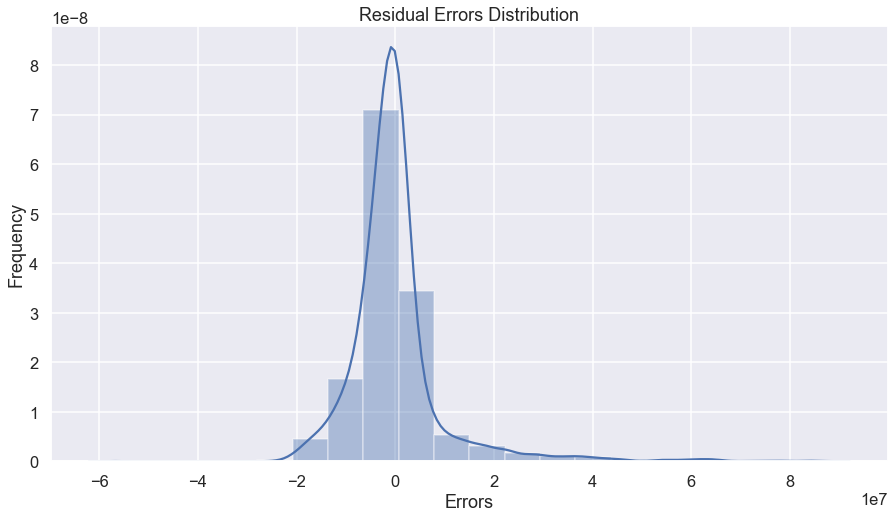

In [64]:
y_pred = lr_9.predict(X_train2_lm)

# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize=(15,8))
sns.distplot((y_train2 - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)

# Plot heading and labels
plt.xlabel('Errors', fontsize = 18)
plt.ylabel('Frequency')
plt.title('Residual Errors Distribution');  

The error terms, as can be seen, closely match a normal distribution. As a result, we may use the model in the test dataset to generate predictions.

# Insights and Recommendations

Major ways to improve tourist influx include:

-Create publicity aimed more at the middle-aged by appealing to things they would find more relatable such as sightseeing and romantic events.

-Way too many tourists visit alone. More tourists should be encouraged to come with family; especially their spouses and children. This can be pitched as family funtime tourism or a romantic getaway.

-The internet and media should be used to create more awareness of the tourist locations. Nwespapers and Magazines providing more information sources than the internet should not be the case in this age
Conference tourism should be popularized

-The model should be used to enable tourists better plan for tours before embarking.